## Objective

To classify MNIST digits using Naive Bayes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
%matplotlib inline

## Prepare dataset

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x = mnist['data']
y = mnist['target']

In [4]:
print(x.dtype, y.dtype)
print(x.shape, y.shape)

float64 object
(70000, 784) (70000,)


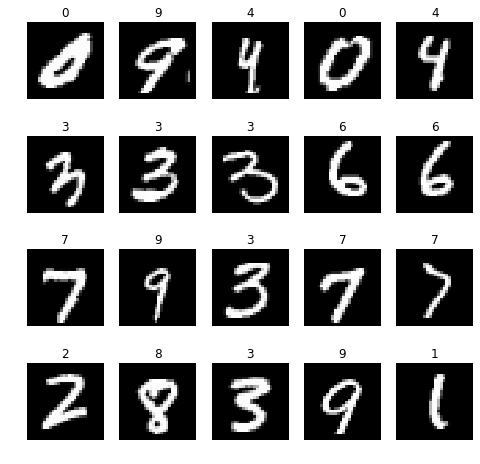

In [6]:
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(8,8))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows, n_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(labels[i])
        
    plt.show()
    
# Let's plot random 20 images
p = np.random.permutation(len(x))
p = p[:20]
plot_images(x[p].reshape(-1, 28, 28), y[p])

In [7]:
y = y.astype("int32")
x = x / 255.0

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y)

In [9]:
train_x.shape, test_x.shape

((52500, 784), (17500, 784))

## Train Model

In [10]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluate Model

In [11]:
cls.score(test_x, test_y)

0.8224

In [12]:
from sklearn.metrics import classification_report
predictions = cls.predict(test_x)
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1783
           1       0.88      0.93      0.90      1907
           2       0.88      0.82      0.85      1799
           3       0.79      0.81      0.80      1810
           4       0.84      0.73      0.78      1691
           5       0.86      0.66      0.75      1569
           6       0.87      0.91      0.89      1757
           7       0.94      0.83      0.88      1818
           8       0.65      0.77      0.71      1673
           9       0.67      0.83      0.74      1693

   micro avg       0.82      0.82      0.82     17500
   macro avg       0.83      0.82      0.82     17500
weighted avg       0.83      0.82      0.82     17500



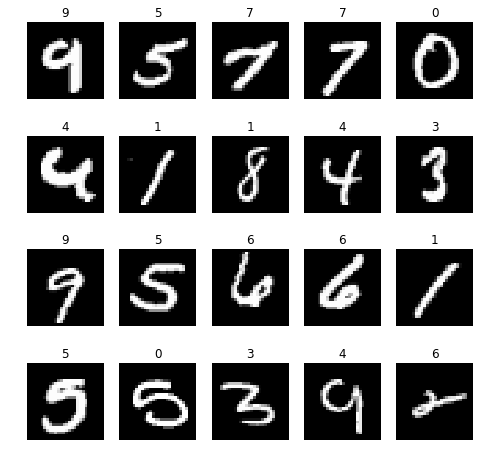

In [13]:
p = np.random.permutation(len(test_x))
p = p[:20]
plot_images(test_x[p].reshape(-1, 28, 28), predictions[p])